Load up necessary libraries

In [ ]:
#Persistence Filter files
from libpython_persistence_filter import *
from libpython_persistence_filter_utils import *
from persistence_filter_test_utils import *

#Python scientific computing stuffs
from numpy import *
from scipy.stats import *
from matplotlib.pyplot import *
%matplotlib inline


#Settings for rendering TeX in MATLAB
rc('text', usetex=True)

#Plotting options
fig_scaling = .75  #Scaling factor for figures
figure_size = (fig_scaling * 8.0, fig_scaling*6.0)  #Figure size, in inches
figure_folder = 'figures/'  #The folder in which to save the output

Configure persistence filter measurement model options

In [ ]:
##Data generation settings

P_M = .2  #Missed detection probability
P_F = .2  #False alarm probability
simulation_length = 125 #Length of simulation in seconds
sampling_period = .01  #Inter-sample period in seconds
survival_time = 115 #Survival time, in seconds


##Persistence filter settings
#Used for an exponential distribution with known rate parameter
l = .01

#Admissible range of lambdas for use with general-purpose prior
lambda_u = 10
lambda_l = .001

#Survival time prior(s)

#Use the exponential prior with rate parameter l
#logS = lambda x : -l*x

#Use the general-purpose prior with the given lower and upper bounds on the possible rate parameters
gp_logS = lambda x : log_general_purpose_survival_function(x, lambda_l, lambda_u)



##The set of times to query the belief of the persistence filter
query_times = arange(0, simulation_length, .01)

Generate samples here

In [ ]:
X_sampling_times = arange(0, simulation_length, sampling_period)
X_t = X_sampling_times <= survival_time 

#First set of observations
first_obs_times = arange(1, 25 + 1, 1)  #Sampling times for first set of observations
first_obs = generate_observations(survival_time, first_obs_times, P_M, P_F)  #Sample Bernoulli observations according to the measurement model
first_obs_bool = first_obs > 0  #Convert Bernoulli observations to Boolean values for use with Persistence Filter


#Second set of observations
second_obs_times = arange(75, 125 + 1, 1)
second_obs = generate_observations(survival_time, second_obs_times, P_M, P_F)  #Sample Bernoulli observations according to the measurement model

second_obs_bool = second_obs > 0

#Concatenate these arrays
t = concatenate( (first_obs_times, second_obs_times) )  #Array of observation times
Y_binary = concatenate( (first_obs, second_obs) )  #Array of (binary) observations
Y_bool = concatenate( (first_obs_bool, second_obs_bool) )  #Array of (Boolean) observations

Plot the observations

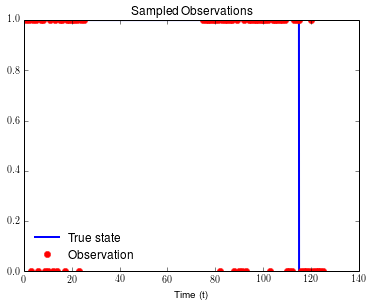

In [19]:
figure(figsize=figure_size)
plot(X_sampling_times, X_t, 'b', linewidth=2, label='True state')
plot(t, Y_binary, 'r', linestyle='None', marker='.', markersize=13, label='Observation')
xlabel('Time (t)')
title('Sampled Observations')
legend(loc='lower left', numpoints=1, frameon=False)
#savefig(figure_folder + 'sampled_observations.eps',  bbox_inches='tight')
show()


Run persistence filter here

In [ ]:
#Run the persistence filter
persistence_beliefs = run_persistence_filter(Y_bool, t, P_M, P_F, query_times, gp_logS)

Plot the results here

In [ ]:
figure(figsize=figure_size)
plot(X_sampling_times, X_t, 'b', linewidth=2, label='True state')
plot(t, Y_binary, 'r', linestyle='None', marker='.', markersize=13, label='Observation')
plot(query_times, persistence_beliefs, 'g', label='Filter belief')
title('Sampled Observations')
xlabel('Time (t)')

legend(loc='lower left', numpoints=1, frameon=False)
#savefig(figure_folder + 'persistence_filter_example.eps',  bbox_inches='tight')
show()